# CSE 510: Project 1 - Thankam Abish


In [1]:
import pandas as pd
import numpy as np

# Part I & II
###### (combined due to overlap)

###### This dataset is found on https://data.buffalony.gov/Public-Safety/Crime-Incidents/d6g9-xbgu/data

In [2]:
crime_data = pd.read_csv('Crime_Incidents.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
##change incident dates to datetime objects
crime_data['incident_datetime'] = pd.to_datetime(crime_data.incident_datetime)

##### Variables:

In [4]:
crime_data.dtypes

incident_id                       int64
case_number                      object
incident_datetime        datetime64[ns]
incident_type_primary            object
incident_description             object
clearance_type                  float64
address_1                        object
address_2                       float64
city                             object
state                            object
zip                              object
country                          object
latitude                        float64
longitude                       float64
created_at                       object
updated_at                       object
location                         object
hour_of_day                       int64
day_of_week                      object
parent_incident_type             object
Council Districts               float64
Police Districts                float64
Zip Codes                       float64
Tracts                          float64
Block Groups                    float64


##### 27 features, 2555126 rows of data

In [5]:
crime_data.shape

(255126, 27)

In [6]:
crime_data = crime_data.sort_values(by=['incident_datetime'])
crime_data.head(5)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,hour_of_day,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks,Neighborhoods
23068,55236827,11-0050386,1910-12-22 00:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block CRESTWOOD AV,NaN,BUFFALO,NY,...,0,Thursday,Theft,7.0,5.0,5.0,51.0,190.0,2820.0,25.0
80899,710086379,15-0760407,1914-12-01 22:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,100 Block LINCOLN PW,NaN,BUFFALO,NY,...,22,Tuesday,Theft,7.0,5.0,12.0,54.0,193.0,453.0,27.0
152017,942663542,06-1840984,1951-07-03 19:51:00,UUV,Buffalo Police are investigating this report o...,NaN,200 Block W FERRY ST,NaN,BUFFALO,NY,...,19,Tuesday,Theft of Vehicle,3.0,1.0,2.0,43.0,23.0,2131.0,26.0
87777,146621859,13-0730379,1951-12-05 02:20:21,ASSAULT,Buffalo Police are investigating this report o...,NaN,200 Block CAMBRIDGE AV,NaN,BUFFALO,NY,...,2,Wednesday,Assault,9.0,2.0,11.0,18.0,165.0,1005.0,1.0
176143,942606470,08-3530528,1952-08-30 16:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block JEFFERSON AV,NaN,BUFFALO,NY,...,16,Saturday,Theft,4.0,3.0,17.0,60.0,184.0,3101.0,23.0


In [7]:
crime_data.describe()

,incident_id,clearance_type,address_2,latitude,longitude,hour_of_day,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks,Neighborhoods
count,2.551260e+05,0.0,0.0,255126.000000,255126.000000,255126.000000,252295.000000,252377.000000,252987.000000,252347.000000,252313.000000,252345.000000,252322.000000
mean,5.529445e+08,NaN,NaN,42.664314,-78.397422,11.686347,4.821986,2.889055,10.743568,41.385949,138.436291,1677.426876,16.974699
std,3.828970e+08,NaN,NaN,3.244124,5.965669,7.484129,2.579323,1.484546,5.921112,23.725573,84.115986,972.534664,10.041369
min,1.006626e+07,NaN,NaN,0.000000,-123.869509,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.042642e+08,NaN,NaN,42.893031,-78.877540,5.000000,3.000000,2.000000,5.000000,20.000000,60.000000,823.000000,8.000000
50%,7.375205e+08,NaN,NaN,42.912856,-78.848424,12.000000,5.000000,3.000000,11.000000,41.000000,137.000000,1662.000000,16.000000
75%,9.425761e+08,NaN,NaN,42.934960,-78.820318,18.000000,7.000000,4.000000,16.000000,63.000000,212.000000,2567.000000,26.000000
max,9.527310e+08,NaN,NaN,44.314844,0.000000,23.000000,9.000000,5.000000,23.000000,79.000000,287.000000,3303.000000,35.000000


In [8]:
crime_data.columns
CD = crime_data[['incident_id', 'case_number', 'incident_datetime',
       'hour_of_day','day_of_week', 'parent_incident_type',
       'Police Districts', 'Zip Codes', 'Neighborhoods ']]

In [9]:
CD = CD.reset_index(drop=True)

In [10]:
CD.head(5)

,incident_id,case_number,incident_datetime,hour_of_day,day_of_week,parent_incident_type,Police Districts,Zip Codes,Neighborhoods
0,55236827,11-0050386,1910-12-22 00:00:00,0,Thursday,Theft,5.0,5.0,25.0
1,710086379,15-0760407,1914-12-01 22:00:00,22,Tuesday,Theft,5.0,12.0,27.0
2,942663542,06-1840984,1951-07-03 19:51:00,19,Tuesday,Theft of Vehicle,1.0,2.0,26.0
3,146621859,13-0730379,1951-12-05 02:20:21,2,Wednesday,Assault,2.0,11.0,1.0
4,942606470,08-3530528,1952-08-30 16:00:00,16,Saturday,Theft,3.0,17.0,23.0


In [11]:
#Drop all rows that contain nan value in any column
CD = CD.dropna()

##### New size of data

In [12]:
CD.shape

(252245, 9)

##### The following shows the counts of several categories within the data such as day of week

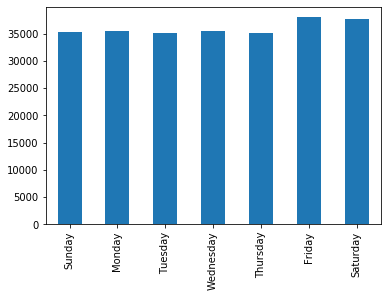

In [13]:
%matplotlib inline
CD.day_of_week = pd.Categorical(CD.day_of_week, categories=['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'], ordered=True)
pd.value_counts(CD['day_of_week'], sort = False).plot.bar()

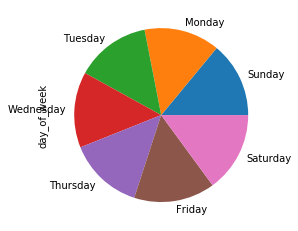

In [14]:
CD.day_of_week.value_counts(sort=False).plot(kind="pie")

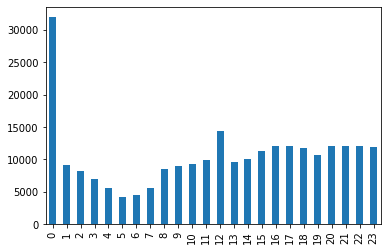

In [15]:
pd.value_counts(CD['hour_of_day']).sort_index().plot.bar()

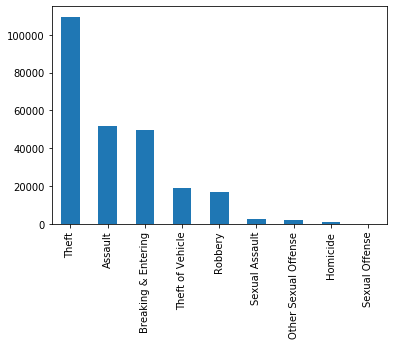

In [16]:
pd.value_counts(CD['parent_incident_type']).plot.bar()

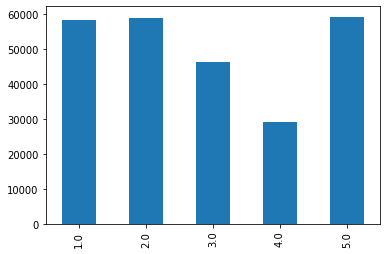

In [17]:
pd.value_counts(CD['Police Districts']).sort_index().plot.bar()

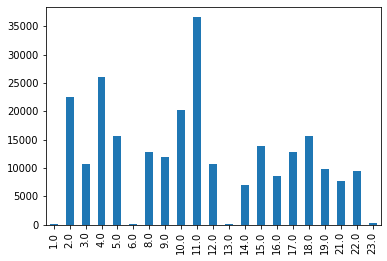

In [18]:
pd.value_counts(CD['Zip Codes']).sort_index().plot.bar()

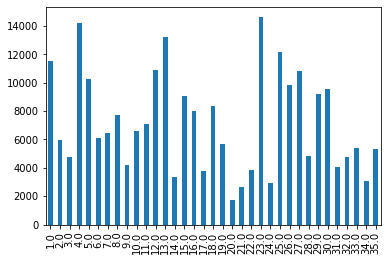

In [19]:
pd.value_counts(CD['Neighborhoods ']).sort_index().plot.bar()

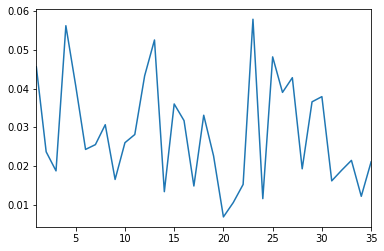

In [20]:
(CD['Neighborhoods '].value_counts() / len(CD)).sort_index().plot.line()

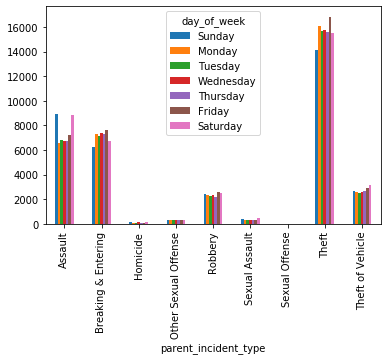

In [21]:
CD.groupby('day_of_week').parent_incident_type.value_counts().unstack(0).plot.bar()

### Mapping for day of week will be:
##### 1 - Sunday
##### 2 - Monday
##### 3 - Tuesday
##### 4 - Wednesday
##### 5 - Thursday
##### 6 - Friday
##### 7 - Saturday

In [22]:
CD['day'] = pd.factorize(CD['day_of_week'], sort=True)[0] + 1 
CD.head(5)

,incident_id,case_number,incident_datetime,hour_of_day,day_of_week,parent_incident_type,Police Districts,Zip Codes,Neighborhoods,day
0,55236827,11-0050386,1910-12-22 00:00:00,0,Thursday,Theft,5.0,5.0,25.0,5
1,710086379,15-0760407,1914-12-01 22:00:00,22,Tuesday,Theft,5.0,12.0,27.0,3
2,942663542,06-1840984,1951-07-03 19:51:00,19,Tuesday,Theft of Vehicle,1.0,2.0,26.0,3
3,146621859,13-0730379,1951-12-05 02:20:21,2,Wednesday,Assault,2.0,11.0,1.0,4
4,942606470,08-3530528,1952-08-30 16:00:00,16,Saturday,Theft,3.0,17.0,23.0,7


### Mapping for parent incident type will be:
##### 1 - Theft
##### 2 - Theft of Vehicle
##### 3 - Assault
##### 4 - Breaking & Entering
##### 5 - Robbery
##### 6 - Other Sexual Offense
##### 7 - Sexual Assault
##### 8 - Homicide
##### 9 - Sexual Offense

In [23]:
CD['parent_incident_type'] = pd.Categorical(CD.parent_incident_type, categories=['Theft', 'Theft of Vehicle', 'Assault', 'Breaking & Entering',
       'Robbery', 'Other Sexual Offense', 'Sexual Assault', 'Homicide',
       'Sexual Offense'], ordered=True)
CD['crime_type'] = pd.factorize(CD['parent_incident_type'], sort=True)[0] + 1 
CD.head(5)

,incident_id,case_number,incident_datetime,hour_of_day,day_of_week,parent_incident_type,Police Districts,Zip Codes,Neighborhoods,day,crime_type
0,55236827,11-0050386,1910-12-22 00:00:00,0,Thursday,Theft,5.0,5.0,25.0,5,1
1,710086379,15-0760407,1914-12-01 22:00:00,22,Tuesday,Theft,5.0,12.0,27.0,3,1
2,942663542,06-1840984,1951-07-03 19:51:00,19,Tuesday,Theft of Vehicle,1.0,2.0,26.0,3,2
3,146621859,13-0730379,1951-12-05 02:20:21,2,Wednesday,Assault,2.0,11.0,1.0,4,3
4,942606470,08-3530528,1952-08-30 16:00:00,16,Saturday,Theft,3.0,17.0,23.0,7,1


In [24]:
begin = pd.Timestamp('2010-07-16')
end = pd.Timestamp('2020-07-16')

CD = CD[(CD['incident_datetime'] > begin) & (CD['incident_datetime'] <= end)]

CD.head(5)
CD.shape

(164116, 11)

##### We will be using a numpy array to create our machine learning models
##### The variables we will be including are hour of day, day, crime type, police district, zip code, and neighborhood

In [25]:
data = CD.to_numpy()

##### We will be using day, police district, zip code, neighborhood as features to determine target variable crime type

In [27]:
data = data[:,(3,6,7,8,9,10)]

In [28]:
data = data.astype(int)

##### I decided to use the classifiers Random Forest, Decision Tree, KNN, and Logistic Regression

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(data[:,(0,1,2,3,4)], data[:,5], test_size=0.2)

In [30]:
#Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
# Making the prediction
y_pred1 = RF.predict(X_test)
display('Random Forest Classifier Score: ', metrics.accuracy_score(Y_test,y_pred1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Random Forest Classifier Score: '

0.4257250792103339

In [31]:
#Decision Tree Classifier
giniImp = DecisionTreeClassifier(criterion = "gini", random_state=100)
giniImp.fit(X_train,Y_train)
# Making the prediction
y_pred2 = giniImp.predict(X_test)
display('Decision Tree Classifier Score: ', metrics.accuracy_score(Y_test,y_pred2))

'Decision Tree Classifier Score: '

0.4346514745308311

In [32]:
#KNN Classifier 
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,Y_train)
y_pred3 = neigh.predict(X_test)
# Making the prediction
display('KNN Classifier Score: ', metrics.accuracy_score(Y_test,y_pred3))

'KNN Classifier Score: '

0.4097611503777724

In [33]:
#Logisitic Regression Classifier
lrmodel = LogisticRegression(multi_class = 'multinomial', solver = 'sag', C = 1000)
lrmodel.fit(X_train,Y_train)
# Making the prediction
y_pred4 = lrmodel.predict(X_test)
display('Logistic Regression Classifier Score: ', metrics.accuracy_score(Y_test,y_pred4))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


'Logistic Regression Classifier Score: '

0.44702047282476237

##### DO NOT RUN, I was unable to run SVM due to speed

In [ ]:
##### DO NOT RUN, took very long time with no result
#SVM Classifier 
svclass = SVC(kernel='linear', gamma = 'auto', C = 1000)
svclass.fit(X_train,Y_train)
# Making the prediction
y_pred5 = svclass.predict(X_test)
display('SVM Classifier Score: ', metrics.accuracy_score(Y_test,y_pred5))

##### I checked to see if scaling the data would give better results for the machine learning models

In [34]:
## USING SCALED DATA
X = np.vstack((X_train, X_test))
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train = X[0:X_train.shape[0],:]
X_test = X[X_train.shape[0]:X.shape[0], :]
#display(data.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
# Making the prediction
y_pred1 = RF.predict(X_test)
display('Random Forest Classifier Score: ', metrics.accuracy_score(Y_test,y_pred1))

#Decision Tree Classifier
giniImp = DecisionTreeClassifier(criterion = "gini", random_state=100)
giniImp.fit(X_train,Y_train)
# make prediction 
y_pred2 = giniImp.predict(X_test)
display('Decision Tree Classifier Score: ', metrics.accuracy_score(Y_test,y_pred2))

#KNN Classifier 
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,Y_train)
# Making the prediction
y_pred3 = neigh.predict(X_test)
display('KNN Classifier Score: ', metrics.accuracy_score(Y_test,y_pred3))

#Logisitic Regression Classifier
lrmodel = LogisticRegression(multi_class = 'multinomial', solver = 'sag', C = 1000)
lrmodel.fit(X_train,Y_train)
# Making the prediction
y_pred4 = lrmodel.predict(X_test)
display('Logistic Regression Classifier Score: ', metrics.accuracy_score(Y_test,y_pred4))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Random Forest Classifier Score: '

0.4260906653668048

'Decision Tree Classifier Score: '

0.4347124055569096

'KNN Classifier Score: '

0.4069887886912016

'Logistic Regression Classifier Score: '

0.44702047282476237

##### After several attempts of trying to better the accuracy on various models, I have concluded that these features might not be enough information to determine what kind of crime has occurred. The next step to this problem might be to find better features that can better predict the target variable (type of crime)

# PART III

##### The following API allows me to get weather data for a certain time period in a certain area I am creating a csv of weather conditions from 2010 to 2012 in buffalo to do some analysis between the weather and the crimes committed on a date

##### to get this data please follow this article https://towardsdatascience.com/obtain-historical-weather-forecast-data-in-csv-format-using-python-5a6c090fc828

In [35]:
from wwo_hist import retrieve_hist_data

In [ ]:
frequency=3
start_date = '07-JUL-2010'
end_date = '07-JUL-2012'
api_key = 'f0c1dcecf70244538a303411201607'
location_list = ['buffalo']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)

In [36]:
begin = pd.Timestamp('2010-07-07')
end = pd.Timestamp('2012-07-07')

CD = CD[(CD['incident_datetime'] > begin) & (CD['incident_datetime'] <= end)]

In [37]:
CD.head(5)

,incident_id,case_number,incident_datetime,hour_of_day,day_of_week,parent_incident_type,Police Districts,Zip Codes,Neighborhoods,day,crime_type
88811,40457978,10-1970204,2010-07-16 00:01:00,0,Friday,Breaking & Entering,5.0,5.0,25.0,6,4
88812,40504253,10-1980751,2010-07-16 00:17:00,0,Friday,Theft,3.0,17.0,8.0,6,1
88813,40458017,10-1970208,2010-07-16 00:30:00,0,Friday,Theft,5.0,5.0,25.0,6,1
88814,40459343,10-1970626,2010-07-16 01:00:00,1,Friday,Robbery,3.0,4.0,1.0,6,5
88815,40458013,10-1970274,2010-07-16 01:00:00,1,Friday,Theft,1.0,15.0,29.0,6,1


In [38]:
buff = pd.read_csv('buffalo.csv')
buff.head(5)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2010-07-07 00:00:00,34,21,0.0,14.5,7,21,01:41 AM,05:05 PM,05:44 AM,...,23,0,71,0.0,1018,22,10,211,11,buffalo
1,2010-07-07 03:00:00,34,21,0.0,14.5,7,21,01:41 AM,05:05 PM,05:44 AM,...,21,0,76,0.0,1018,21,10,219,10,buffalo
2,2010-07-07 06:00:00,34,21,0.0,14.5,7,21,01:41 AM,05:05 PM,05:44 AM,...,9,8,72,0.0,1019,25,10,229,7,buffalo
3,2010-07-07 09:00:00,34,21,0.0,14.5,7,21,01:41 AM,05:05 PM,05:44 AM,...,10,24,51,0.0,1018,31,10,268,8,buffalo
4,2010-07-07 12:00:00,34,21,0.0,14.5,7,21,01:41 AM,05:05 PM,05:44 AM,...,6,49,43,0.0,1018,34,10,234,5,buffalo


In [39]:
buff['date_time'] = pd.to_datetime(buff.date_time)

##### We can join the dataframes based on closest equivalent date and time

In [40]:
CD.index = CD['incident_datetime']
buff.index = buff['date_time']
# the magic happens below, check the direction and tolerance arguments
# if you want you can make a maximum tolerance on which to merge data
tol = pd.Timedelta('3 day')
both = pd.merge_asof(left=CD,right=buff,right_index=True,left_index=True,direction='nearest',tolerance=tol)
both.head(5)

,incident_id,case_number,incident_datetime,hour_of_day,day_of_week,parent_incident_type,Police Districts,Zip Codes,Neighborhoods,day,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
incident_datetime,,,,,,,,,,,,,,,,,,,,,
2010-07-16 00:01:00,40457978,10-1970204,2010-07-16 00:01:00,0,Friday,Breaking & Entering,5.0,5.0,25.0,6,...,26,31,69,0.0,1012,24,10,208,13,buffalo
2010-07-16 00:17:00,40504253,10-1980751,2010-07-16 00:17:00,0,Friday,Theft,3.0,17.0,8.0,6,...,26,31,69,0.0,1012,24,10,208,13,buffalo
2010-07-16 00:30:00,40458017,10-1970208,2010-07-16 00:30:00,0,Friday,Theft,5.0,5.0,25.0,6,...,26,31,69,0.0,1012,24,10,208,13,buffalo
2010-07-16 01:00:00,40459343,10-1970626,2010-07-16 01:00:00,1,Friday,Robbery,3.0,4.0,1.0,6,...,26,31,69,0.0,1012,24,10,208,13,buffalo
2010-07-16 01:00:00,40458013,10-1970274,2010-07-16 01:00:00,1,Friday,Theft,1.0,15.0,29.0,6,...,26,31,69,0.0,1012,24,10,208,13,buffalo


In [41]:
both.columns

Index(['incident_id', 'case_number', 'incident_datetime', 'hour_of_day',
       'day_of_week', 'parent_incident_type', 'Police Districts', 'Zip Codes',
       'Neighborhoods ', 'day', 'crime_type', 'date_time', 'maxtempC',
       'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination',
       'moonrise', 'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph', 'location'],
      dtype='object')

In [42]:
both.describe()

,incident_id,hour_of_day,Police Districts,Zip Codes,Neighborhoods,day,crime_type,maxtempC,mintempC,totalSnow_cm,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,3.927600e+04,39276.000000,39276.000000,39276.000000,39276.000000,39276.000000,39276.00000,39276.000000,39276.000000,39276.000000,...,39276.000000,39276.000000,39276.000000,39276.000000,39276.000000,39276.000000,39276.000000,39276.000000,39276.000000,39276.00000
mean,1.423019e+08,11.910123,2.874478,10.730064,16.975023,4.055734,2.49753,14.335676,7.113657,0.088036,...,8.945259,23.706462,45.766804,80.606121,0.202345,1014.970898,10.595300,8.726856,208.423847,14.42927
std,2.318733e+08,7.409469,1.488553,5.877961,9.930178,2.009076,1.52179,10.293120,8.946516,0.414733,...,11.822076,12.273041,36.445190,14.275468,0.939023,7.378610,9.716855,2.918488,90.452574,7.65490
min,4.045796e+07,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,-10.000000,-19.000000,0.000000,...,-23.000000,0.000000,0.000000,27.000000,0.000000,987.000000,-19.000000,0.000000,0.000000,0.00000
25%,5.570720e+07,6.000000,2.000000,5.000000,8.000000,2.000000,1.00000,6.000000,0.000000,0.000000,...,0.000000,15.000000,11.000000,71.000000,0.000000,1011.000000,3.000000,10.000000,160.000000,9.00000
50%,7.807798e+07,13.000000,3.000000,11.000000,16.000000,4.000000,2.00000,15.000000,7.000000,0.000000,...,10.000000,22.000000,39.000000,84.000000,0.000000,1015.000000,11.000000,10.000000,228.000000,13.00000
75%,1.009168e+08,18.000000,4.000000,16.000000,26.000000,6.000000,4.00000,24.000000,15.000000,0.000000,...,19.000000,31.000000,82.000000,93.000000,0.000000,1020.000000,19.000000,10.000000,271.000000,18.00000
max,9.441322e+08,23.000000,5.000000,23.000000,35.000000,7.000000,8.00000,31.000000,24.000000,6.400000,...,32.000000,103.000000,100.000000,100.000000,25.900000,1038.000000,31.000000,10.000000,360.000000,59.00000


##### The below visualizations all show our new features such as cloud cover, feels like C, and temp C do not vary depending on the type of crime

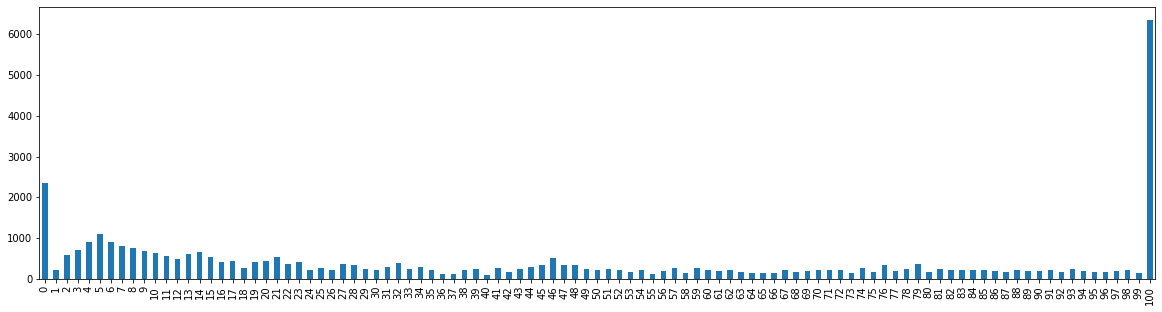

In [43]:
both.cloudcover.value_counts().sort_index().plot.bar(figsize=(20,5))

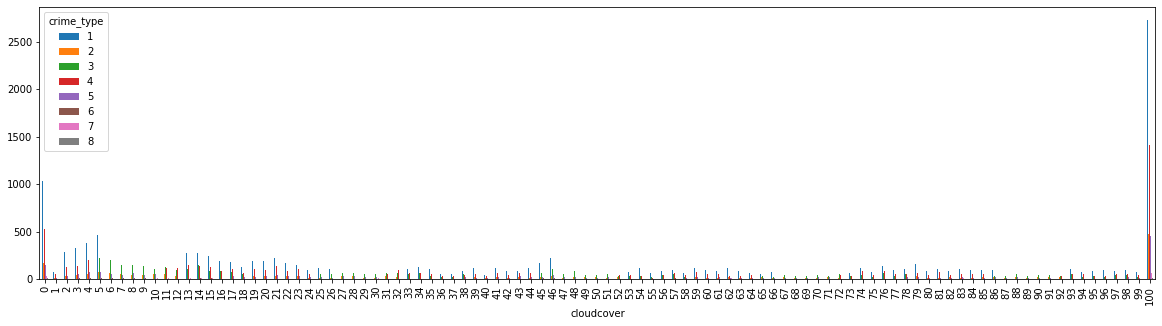

In [44]:
both.groupby('crime_type').cloudcover.value_counts().unstack(0).plot.bar(figsize=(20,5))

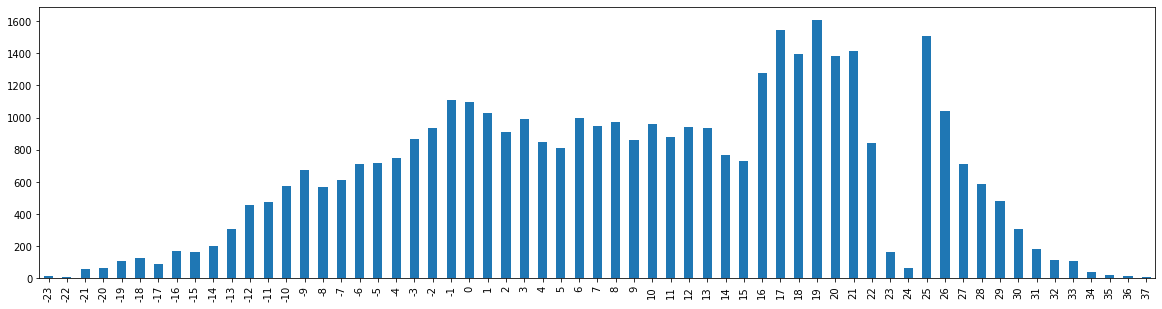

In [45]:
both.FeelsLikeC.value_counts().sort_index().plot.bar(figsize=(20,5))

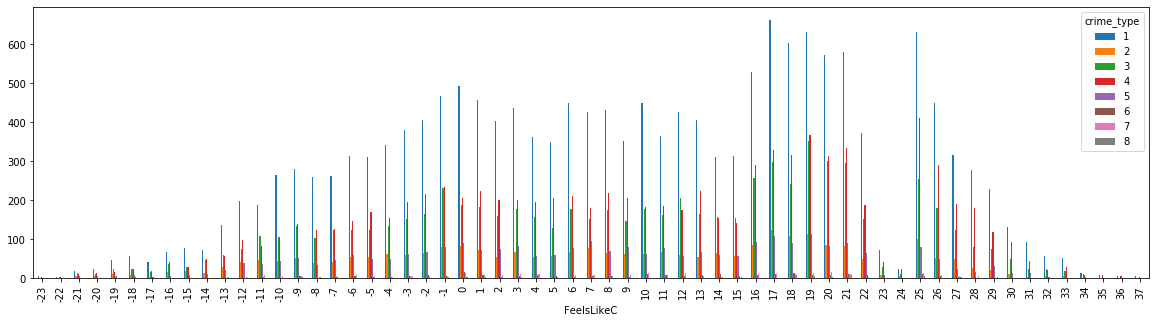

In [46]:
both.groupby('crime_type').FeelsLikeC.value_counts().unstack(0).plot.bar(figsize=(20,5))

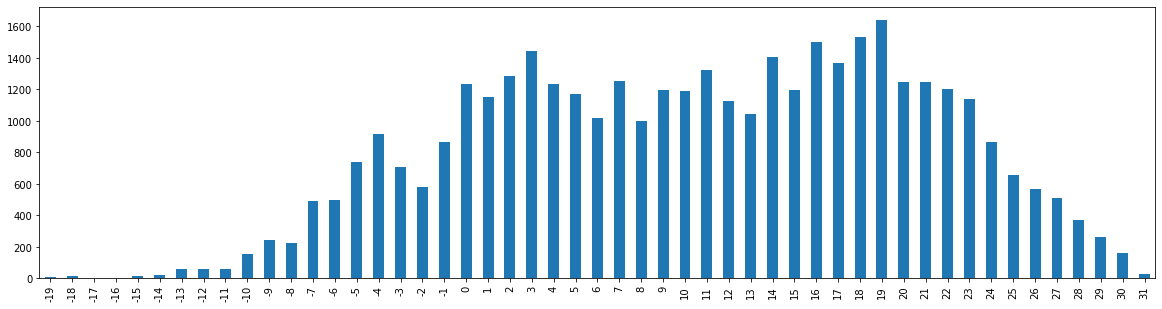

In [47]:
both.tempC.value_counts().sort_index().plot.bar(figsize=(20,5))

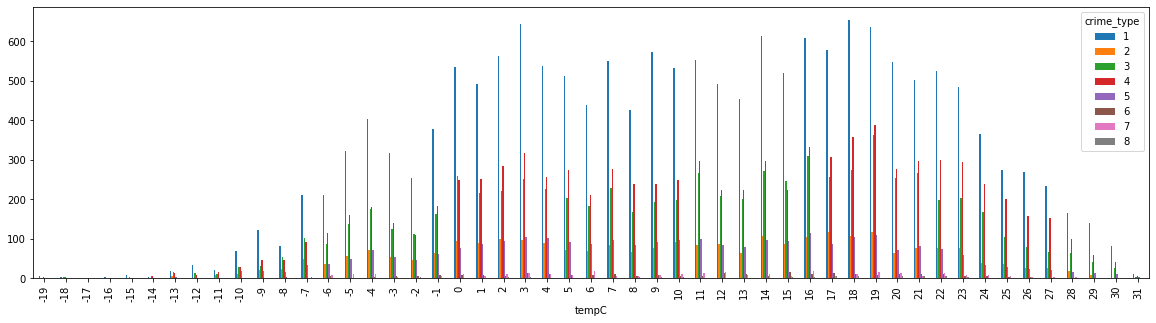

In [48]:
both.groupby('crime_type').tempC.value_counts().unstack(0).plot.bar(figsize=(20,5))

In [49]:
both = both[['hour_of_day',
       'Police Districts', 'Zip Codes',
       'Neighborhoods ', 'day', 'crime_type','maxtempC',
       'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination',
       'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph']]

In [50]:
data = both.to_numpy()
data = data.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(data[:,(0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)], data[:,5], test_size=0.2)

##### We can verify these added features can't help us build a better machine learning model, and we must search for better variables

In [51]:
#Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
# Making the prediction
y_pred1 = RF.predict(X_test)
display('Random Forest Classifier Score: ', metrics.accuracy_score(Y_test,y_pred1))

#Decision Tree Classifier
giniImp = DecisionTreeClassifier(criterion = "gini", random_state=100)
giniImp.fit(X_train,Y_train)
# make prediction 
y_pred2 = giniImp.predict(X_test)
display('Decision Tree Classifier Score: ', metrics.accuracy_score(Y_test,y_pred2))

#KNN Classifier 
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,Y_train)
# Making the prediction
y_pred3 = neigh.predict(X_test)
display('KNN Classifier Score: ', metrics.accuracy_score(Y_test,y_pred3))

#Logisitic Regression Classifier
lrmodel = LogisticRegression(multi_class = 'multinomial', solver = 'sag', C = 1000)
lrmodel.fit(X_train,Y_train)
# Making the prediction
y_pred4 = lrmodel.predict(X_test)
display('Logistic Regression Classifier Score: ', metrics.accuracy_score(Y_test,y_pred4))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Random Forest Classifier Score: '

0.3918024439918534

'Decision Tree Classifier Score: '

0.32382892057026474

'KNN Classifier Score: '

0.38785641547861505

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


'Logistic Regression Classifier Score: '

0.43609979633401225

##### The function corr() defaults to give us the Pearson correlation coefficient, and as you can see by the results below, these features are not correlated with crime type

In [52]:
both[both.columns[1:]].corr()['crime_type'][:]

Police Districts    -0.031182
Zip Codes           -0.001805
Neighborhoods        0.000455
day                 -0.004531
crime_type           1.000000
maxtempC             0.019960
mintempC             0.020566
totalSnow_cm        -0.007250
sunHour              0.002696
uvIndex              0.020351
moon_illumination   -0.003916
DewPointC            0.018198
FeelsLikeC           0.008994
HeatIndexC           0.008057
WindChillC           0.009206
WindGustKmph        -0.000203
cloudcover           0.000962
humidity             0.029418
precipMM             0.007496
pressure            -0.000731
tempC                0.008582
visibility          -0.011245
winddirDegree       -0.009735
windspeedKmph       -0.008234
Name: crime_type, dtype: float64

##### After this analysis, the features of the combined datasets are not correlated to the crime_type and therefore cannot help with creating a better model. 